In [77]:
from lacbox.io import load_stats, load_oper
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

BB_PATH = Path.cwd().parent / 'our_design/BB_turb_stats.csv'  # path to mean steady stats
STATS_PATH = Path.cwd().parent / 'dtu_10MW' / 'turb' / 'dtu_10mw_turb_stats.hdf5'  # path to mean steady stats
SUBFOLDER = 'tca' 


In [78]:
# load the HAWC2 data from the stats file. Isolate the simulations with no tilt.
df_DTU, wsps_DTU = load_stats(STATS_PATH, subfolder=SUBFOLDER, statstype='turb')
df_BB, wsps_BB = load_stats(BB_PATH, subfolder=SUBFOLDER, statstype='turb')

SEEDS = 6



In [79]:
# def extract_and_DEL(wsps, chan_df, seeds):
#     """
#     Extract and order:
#      - del4, del4, del5, del8, del10, del12 for the points
#     """
# 
#     # extract hawc2 wind and channel to plot from the HAWC2 stats
#     val_wsp, val_del4, val_del4, val_del5, val_del8, val_del10, val_del12 = chan_df['wsp'], chan_df['del4'], chan_df['del4'], chan_df['del5'], chan_df['del8'], chan_df['del10'], chan_df['del12']
#     
#     val_wsp, val_del4, val_del4, val_del5, val_del8, val_del10, val_del12 = np.array(val_wsp), np.array(val_del4), np.array(val_del4), np.array(val_del5), np.array(val_del8), np.array(val_del10), np.array(val_del12)
#     
#     i_val = np.argsort(val_wsp)
# 
#     # Get mean of max/mean/min
#     mean_del4 = np.average(val_del4[i_val].reshape(-1, seeds), axis=1)
#     mean_del4 = np.average(val_del4[i_val].reshape(-1, seeds), axis=1)
#     mean_del5 = np.average(val_del4[i_val].reshape(-1, seeds), axis=1)
#     
#     points = {
#         'wsp': val_wsp[i_val],
#         'del4': mean_del4[i_val],
#         'del4': mean_del4[i_val],
#         'del5': mean_del5[i_val]
#     }
# 
#     lines = {
#         'wsp': wsps,
#         'del4': mean_del4,
#         'del4': mean_del4,
#         'del5': mean_del5
#     }
# 
#     return points, lines

In [80]:
def extract_and_DEL(wsps, chan_df, seeds, del_col):
    """
    Extract and order DEL values (del4, del4, del5, del8, del10, del12) from chan_df.
    
    Parameters:
        wsps (array-like): Wind speed values for each simulation.
        chan_df (DataFrame): Dataframe with DEL columns for each wind speed.
        seeds (int): Number of seeds used for averaging.
        
    Returns:
        points (dict): Ordered DEL values (mean of del4, del4, etc.) for each wind speed.
        lines (dict): Mean DEL values over seeds for each wind speed.
    """
    # Extract wind speed data and DEL columns
    val_wsp = np.array(chan_df['wsp'])
    
    # Sort indices based on wind speed
    i_val = np.argsort(val_wsp)
    
    # Define list of DEL columns to process
    # del_columns = ['del4', 'del4', 'del5', 'del8', 'del10', 'del12']
    
    # Initialize dictionaries to store ordered DEL values
    points = {'wsp': val_wsp[i_val]}
    lines = {'wsp': wsps}
    

    # Extract and order the DEL data for this column
    del_data = np.array(chan_df[del_col])[i_val]
    
    # Calculate mean over seeds
    mean_del = np.average(del_data.reshape(-1, seeds), axis=1)
    # del_data.reshape(-1, seeds)
    # mean_del = np.sqrt(np.average(del_data.reshape(-1, seeds)**2, axis=1))
    
    # Store the mean values in the dictionaries
    points[del_col] = del_data
    lines[del_col] = mean_del

    return points, lines


In [81]:
CHAN_DESCS = {'TbFA': 'momentmx mbdy:tower nodenr:   1',
              'TbSS': 'momentmy mbdy:tower nodenr:   1',
              'YbTilt': 'momentmx mbdy:tower nodenr:  11',
              'YbRoll': 'momentmy mbdy:tower nodenr:  11',
              'ShftTrs': 'momentmz mbdy:shaft nodenr:   4',
              'OoPBRM': 'momentmx mbdy:blade1 nodenr:   1 coo: hub1',
              'IPBRM': 'momentmy mbdy:blade1 nodenr:   1 coo: hub1',
              'FlpBRM': 'momentmx mbdy:blade1 nodenr:   1 coo: blade1',
              'EdgBRM': 'momentmy mbdy:blade1 nodenr:   1 coo: blade1',
              'OoPHub': 'momentmx mbdy:hub1 nodenr:   1 coo: hub1',
              'IPHub': 'momentmy mbdy:hub1 nodenr:   1 coo: hub1',
              }

# what channels we want to plot
chan_ids = ['TbFA', 'TbSS',
            'YbTilt', 'YbRoll', 'ShftTrs', 'OoPBRM', 'IPBRM']

del_ids = ['del4','del4','del5','del8','del10', 'del12']

del_loads = {}
for iplot, chan_id in enumerate(chan_ids):
    
    chan_df = df.filter_channel(chan_id, CHAN_DESCS)
    
    # del_loads[chan_id] = [chan_df[del_id] for del_id in del_ids]
    
    points_BB, lines_BB = extract_and_DEL(wsps_BB, chan_df, SEEDS, "del4")
    
    print(points_BB)
    print(lines_BB)
    
    # points_BB_Wsp = np.unique(points_BB['wsp'])
    
# print(del_loads)


# print(del_loads['TbFA'][0])

{'wsp': array([ 5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,
        7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,
        9.,  9.,  9.,  9., 10., 10., 10., 10., 10., 10., 11., 11., 11.,
       11., 11., 11., 12., 12., 12., 12., 12., 12., 13., 13., 13., 13.,
       13., 13., 14., 14., 14., 14., 14., 14., 15., 15., 15., 15., 15.,
       15., 16., 16., 16., 16., 16., 16., 17., 17., 17., 17., 17., 17.,
       18., 18., 18., 18., 18., 18., 19., 19., 19., 19., 19., 19., 20.,
       20., 20., 20., 20., 20., 21., 21., 21., 21., 21., 21., 22., 22.,
       22., 22., 22., 22., 23., 23., 23., 23., 23., 23., 24., 24., 24.,
       24., 24., 24.]), 'del4': array([43546.39930582, 34222.73837354, 50795.02020986, 55454.496635  ,
       49645.98229272, 36507.24233848, 57679.20679958, 68820.54506357,
       51891.63225097, 57111.08207897, 57487.98492417, 65362.3394237 ,
       49795.21747925, 42992.09210081, 77161.59749191, 68081.56552038,
       44715.90151939, 41717

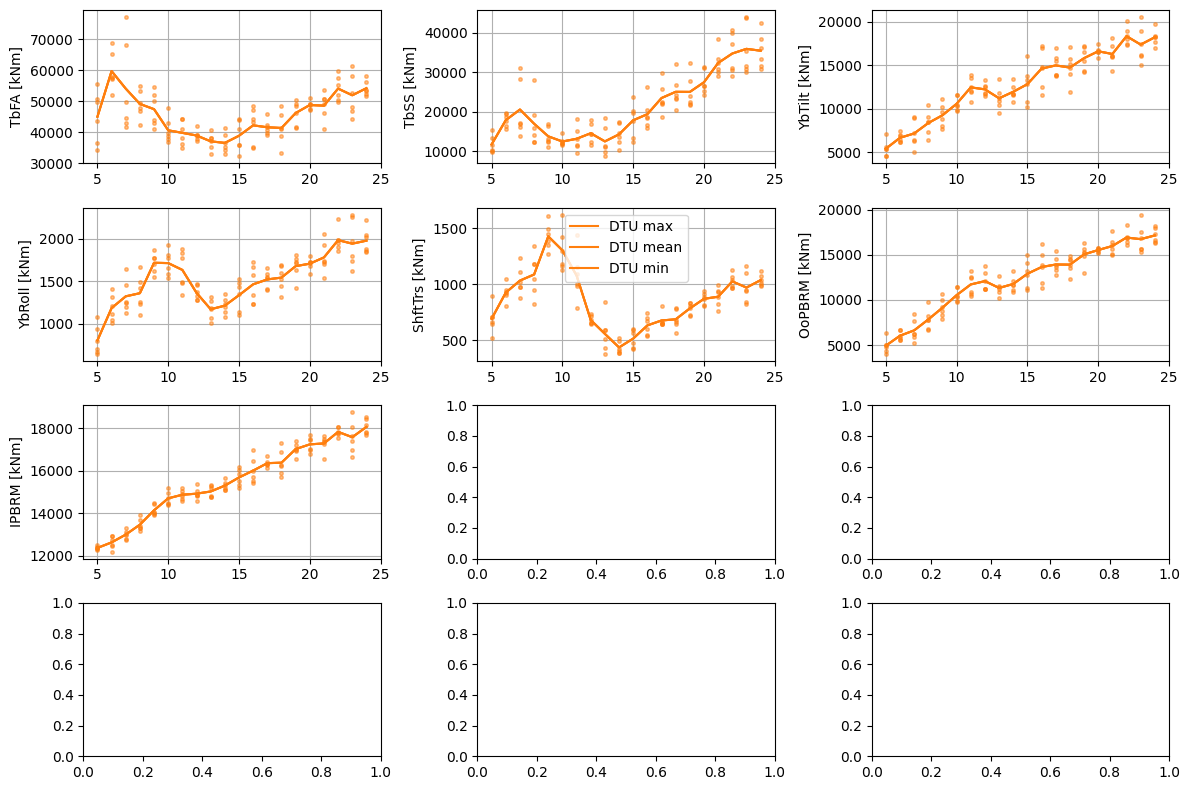

In [82]:
fig, axs = plt.subplots(4, 3, figsize=(12, 8), clear=True)


# loop over each channels and plot the steady state with the theory line
for iplot, chan_id in enumerate(chan_ids):
    
    # isolate the channel data and get statistics
    chan_df_BB = df_BB.filter_channel(chan_id, CHAN_DESCS)
    chan_df_DTU = df_DTU.filter_channel(chan_id, CHAN_DESCS)

    # extract and order statistics
    points_BB, lines_BB = extract_and_DEL(wsps_BB, chan_df_BB, SEEDS, "del4")    
    points_DTU, lines_DTU = extract_and_DEL(wsps_DTU, chan_df_DTU, SEEDS, "del4") 

    # For JIMALEXX
    # if chan_id == 'TbFA':
        # print('The max of the lines_DTU["max"] is ', np.max(lines_DTU['max']))

    # plot the results
    ax = axs.flatten()[iplot]
    # ax.plot(points_BB['wsp'], points_BB['del4'], '.', color='C0', alpha=0.2, markersize=5)
    # ax.plot(points_BB['wsp'], points_BB['del4'], '.', color='C0', alpha=0.2, markersize=5)
    # ax.plot(points_BB['wsp'], points_BB['del4'], '.', color='C0', alpha=0.2, markersize=5)
    # ax.plot(lines_BB['wsp'], lines_BB['del4'], '-', color='C0', label='HAWC2 max')
    # ax.plot(lines_BB['wsp'], lines_BB['del4'], '-', color='C0', label='HAWC2 mean')
    # ax.plot(lines_BB['wsp'], lines_BB['del4'], '-', color='C0', label='HAWC2 min')

    ax.plot(points_DTU['wsp'], points_DTU['del4'], '.', color='C1', alpha=0.2, markersize=5)
    ax.plot(points_DTU['wsp'], points_DTU['del4'], '.', color='C1', alpha=0.2, markersize=5)
    ax.plot(points_DTU['wsp'], points_DTU['del4'], '.', color='C1', alpha=0.2, markersize=5)
    ax.plot(lines_DTU['wsp'], lines_DTU['del4'], '-', color='C1', label='DTU max')
    ax.plot(lines_DTU['wsp'], lines_DTU['del4'], '-', color='C1', label='DTU mean')
    ax.plot(lines_DTU['wsp'], lines_DTU['del4'], '-', color='C1', label='DTU min')

    ax.grid('on')
    ax.set(xlabel='Wind speed [m/s]' if iplot > 8 else None,
           ylabel=f'{chan_id} [{chan_df_BB.units.iloc[0]}]', xlim=[4, 25])

axs[1, 1].legend()
fig.tight_layout()

plt.show()